In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Duplicate key in file PosixPath('/Users/kaixuanchin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 266 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')


In [2]:
# abbrev to state and vice versa
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [3]:
# group states into regions 
regions_to_states = {
    'South': ['West Virginia', 'District of Columbia', 'Maryland', 'Virginia',
              'Kentucky', 'Tennessee', 'North Carolina', 'Mississippi',
              'Arkansas', 'Louisiana', 'Alabama', 'Georgia', 'South Carolina',
              'Florida', 'Delaware'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'West': ['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana',
             'Wyoming', 'Utah', 'Colorado', 'Alaska', 'Hawaii'],
    'Midwest': ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota',
                'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana',
                'Ohio'],
    'Northeast': ['Maine', 'Vermont', 'New York', 'New Hampshire', 'Massachusetts',
                  'Rhode Island', 'Connecticut', 'New Jersey', 'Pennsylvania']
}

states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}

In [4]:
accident_df = pd.read_csv('../data/US_Accidents_Dec21_updated.csv')
accident_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
# severity df 
severity_df = accident_df.loc[:, ['ID', 'Severity', 'Start_Lat', 'Start_Lng', 'State']]
severity_df.head()

,ID,Severity,Start_Lat,Start_Lng,State
0,A-1,3,40.108910,-83.092860,OH
1,A-2,2,39.865420,-84.062800,OH
2,A-3,2,39.102660,-84.524680,OH
3,A-4,2,41.062130,-81.537840,OH
4,A-5,3,39.172393,-84.492792,OH


In [ ]:
severity_df['State_Name'] = severity_df['State'].apply(lambda s : abbrev_to_us_state.get(s))
severity_df.head()

,ID,Severity,Start_Lat,Start_Lng,State,State_Name
0,A-1,3,40.108910,-83.092860,OH,Ohio
1,A-2,2,39.865420,-84.062800,OH,Ohio
2,A-3,2,39.102660,-84.524680,OH,Ohio
3,A-4,2,41.062130,-81.537840,OH,Ohio
4,A-5,3,39.172393,-84.492792,OH,Ohio


In [18]:
severity_df.to_csv('../data/output/us_accident_severity.csv')

In [5]:
accident_df['Street'].head()

0    Outerbelt E
1         I-70 E
2         I-75 S
3         I-77 N
4         I-75 S
Name: Street, dtype: object

In [100]:
accident_counts = accident_df.groupby(accident_df['State']).size().reset_index(name="Count")
accident_counts = accident_counts.sort_values(['Count'], ascending=False)
accident_counts.head()

,State,Count
3,CA,795868
8,FL,401388
41,TX,149037
35,OR,126341
43,VA,113535


In [7]:
accident_counts['State_Name'] = accident_counts['State'].apply(lambda s : abbrev_to_us_state.get(s))

In [8]:
accident_counts['Region']= accident_counts['State_Name'].apply(lambda s: states_to_regions.get(s))

In [9]:
accident_counts.to_csv('../data/accident_counts.csv')

### 1. Total Accidents in each States 

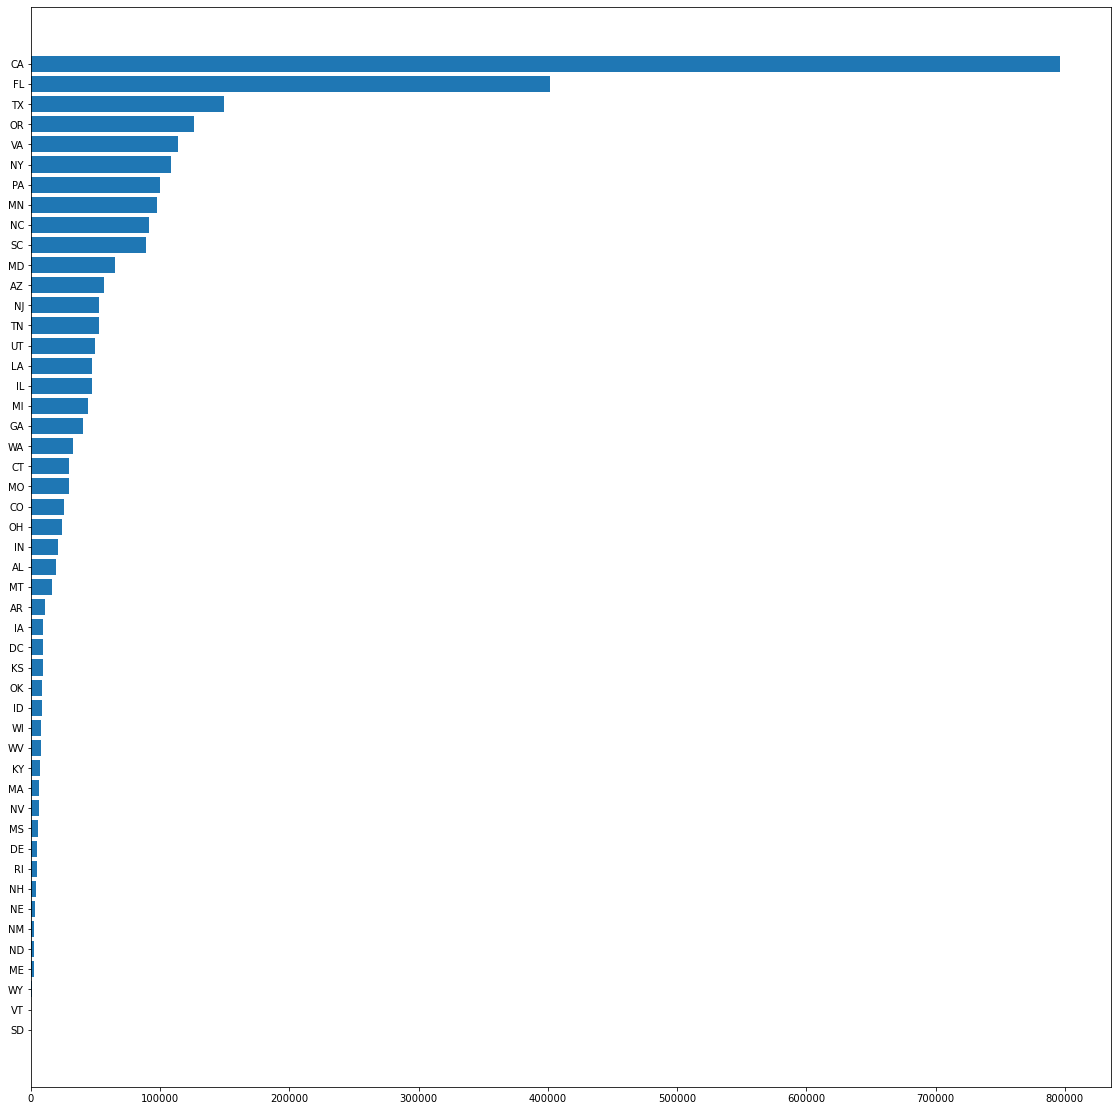

In [7]:
# Total Accidents in each States ( bar chart )
total_accident_fig = plt.figure(figsize=(15,15))
ax = total_accident_fig.add_axes([0,0,1,1])
ax.barh(accident_counts['State'], accident_counts['Count'], height=0.8)
ax.invert_yaxis() 
plt.savefig("../plots/total_accident.svg")
plt.show()
plt.close()


In [ ]:
# total accident in each states (maps)


In [101]:
states = pd.read_csv('../data/us_tile_grid.csv')
states.head()


,code,name,row,column
0,AL,Alabama,1,6
1,AK,Alaska,7,0
2,AZ,Arizona,2,2
3,AR,Arkansas,2,5
4,CA,California,3,0


In [162]:
at_night = accident_df.groupby(['Nautical_Twilight','Severity']).size().reset_index(name='Count')
at_night

,Nautical_Twilight,Severity,Count
0,Day,1,23279
1,Day,2,1831929
2,Day,3,120512
3,Day,4,87752
4,Night,1,2771
5,Night,2,698690
6,Night,3,34589
7,Night,4,42953


In [159]:
at_night = accident_df.groupby('Civil_Twilight').size().reset_index(name='Count')
at_night

,Civil_Twilight,Count
0,Day,1929103
1,Night,913372


In [160]:
at_night = accident_df.groupby('Astronomical_Twilight').size().reset_index(name='Count')
at_night

,Astronomical_Twilight,Count
0,Day,2176983
1,Night,665492


### Avg Severity in each States


In [5]:
# avg serverity for each states 

accident_severity_mean =  pd.DataFrame(accident_df.groupby(['State'])['Severity'].mean().reset_index())
accident_severity_mean = accident_severity_mean.sort_values(by='Severity')

In [6]:
accident_severity_mean.head()

,State,Severity
26,ND,2.011957
24,MT,2.037397
3,CA,2.041998
21,MN,2.047085
38,SC,2.050226


In [ ]:
accident_count_severe = accident_severity_mean.merge(accident_counts, on='State')
accident_count_severe = accident_count_severe.sort_values(by='Count', ascending=False)
accident_count_severe.head()

,State,Severity,Count
2,CA,2.041998,795868
6,FL,2.069359,401388
18,TX,2.184941,149037
9,OR,2.073705,126341
17,VA,2.176650,113535


In [12]:
# standardizing severity and count
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
list_of_states = accident_count_severe['State']
standardize_data = scaler.fit_transform(accident_count_severe[['Severity', 'Count']])
standardize_df = pd.DataFrame(standardize_data, columns=['Severity', 'Count'])
standardize_df['State'] = list_of_states
standardize_df.head()

,Severity,Count,State
0,-1.174709,5.935207,ND
1,-1.024295,2.761825,MT
2,-0.388904,0.731796,CA
3,-1.000404,0.549218,MN
4,-0.434479,0.446201,SC


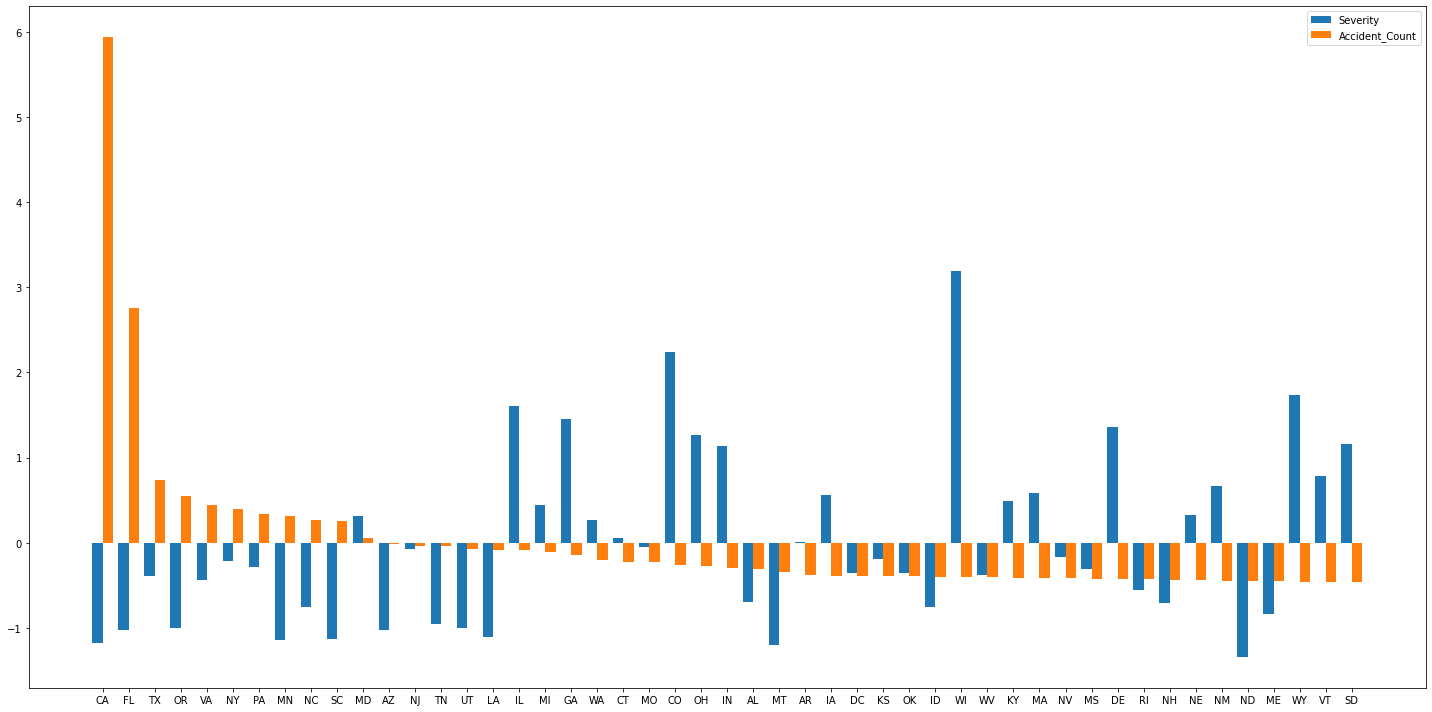

In [13]:
import numpy as np

width = 0.40
x = np.arange(len(list_of_states))

severity_state_fig, ax5 = plt.subplots(figsize=(20,10))
rects1 = ax5.bar(x - 0.2, standardize_df['Severity'], width, label='Severity')
rects2 = ax5.bar(x + 0.2, standardize_df['Count'], width, label='Accident_Count')

ax5.set_xticks(x)
ax5.set_xticklabels(list_of_states)
ax5.legend()

severity_state_fig.tight_layout()
plt.show()

In [14]:
severity_count = accident_df.groupby('Severity').size().reset_index(name='Severity_Count')
severity_count

,Severity,Severity_Count
0,1,26053
1,2,2532991
2,3,155105
3,4,131193


In [33]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [34]:
shape_path = '../data/cb_2018_us_state_500k.shp'

states = gpd.read_file(shape_path)


In [35]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [38]:
def get_yearly_accident(data, year):
    result = data[data['Year'] == year]
    return result

In [39]:
accident_2016_df = get_yearly_accident(accident_df, 2016)
accident_2017_df = get_yearly_accident(accident_df, 2017)
accident_2018_df = get_yearly_accident(accident_df, 2018)
accident_2019_df = get_yearly_accident(accident_df, 2019)
accident_2020_df = get_yearly_accident(accident_df, 2020)
accident_2021_df = get_yearly_accident(accident_df, 2021)

In [68]:
accident_2016_df.to_csv('../data/accident_2016.csv')
accident_2017_df.to_csv('../data/accident_2017.csv')
accident_2018_df.to_csv('../data/accident_2018.csv')
accident_2019_df.to_csv('../data/accident_2019.csv')
accident_2020_df.to_csv('../data/accident_2020.csv')
accident_2021_df.to_csv('../data/accident_2021.csv')

In [55]:
state_coor = pd.read_csv('../data/statelatlong.csv')

In [70]:
accident_2016_count = accident_2016_df.groupby('State').size().reset_index(name='Count')

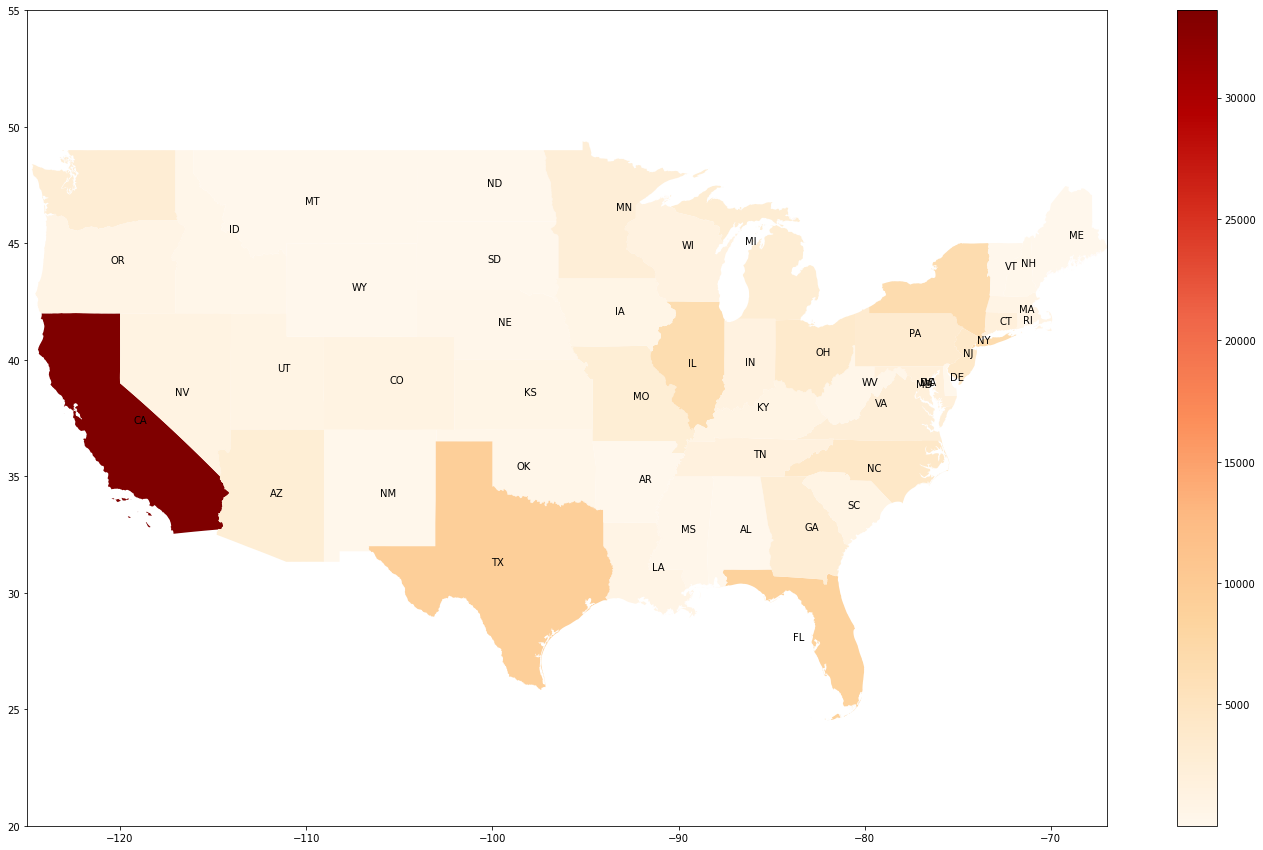

In [74]:
# merge usa_state data and geo_usa shapefile
geo_merge= pd.merge(states,accident_2016_count,left_on='STUSPS', right_on='State')
geo_merge = pd.merge(geo_merge, state_coor, left_on='STUSPS', right_on='State')
geo_merge.plot(column='Count',figsize=(25, 15),legend=True,cmap='OrRd')
plt.xlim(-125,-67)
plt.ylim(20,55)
# add countries names and numbers 
for i in range(len(geo_merge)):
    plt.text(geo_merge.Longitude[i],geo_merge.Latitude[i],"{}".format(geo_merge.STUSPS[i]),size=10)
plt.show()

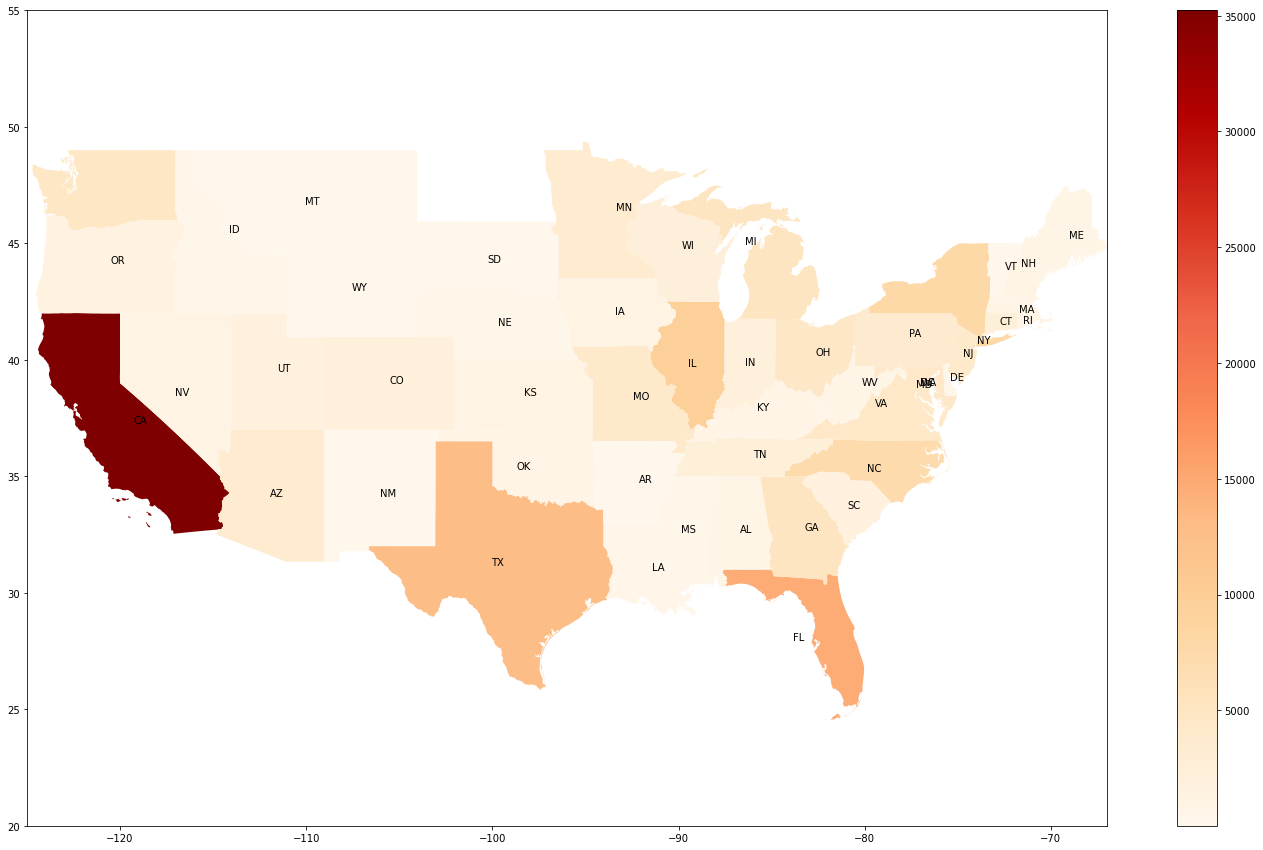

In [75]:
accident_2017_count = accident_2017_df.groupby('State').size().reset_index(name='Count')
# merge usa_state data and geo_usa shapefile
geo_merge= pd.merge(states,accident_2017_count,left_on='STUSPS', right_on='State')
geo_merge = pd.merge(geo_merge, state_coor, left_on='STUSPS', right_on='State')
geo_merge.plot(column='Count',figsize=(25, 15),legend=True,cmap='OrRd')
plt.xlim(-125,-67)
plt.ylim(20,55)
# add countries names and numbers 
for i in range(len(geo_merge)):
    plt.text(geo_merge.Longitude[i],geo_merge.Latitude[i],"{}".format(geo_merge.STUSPS[i]),size=10)
plt.show()

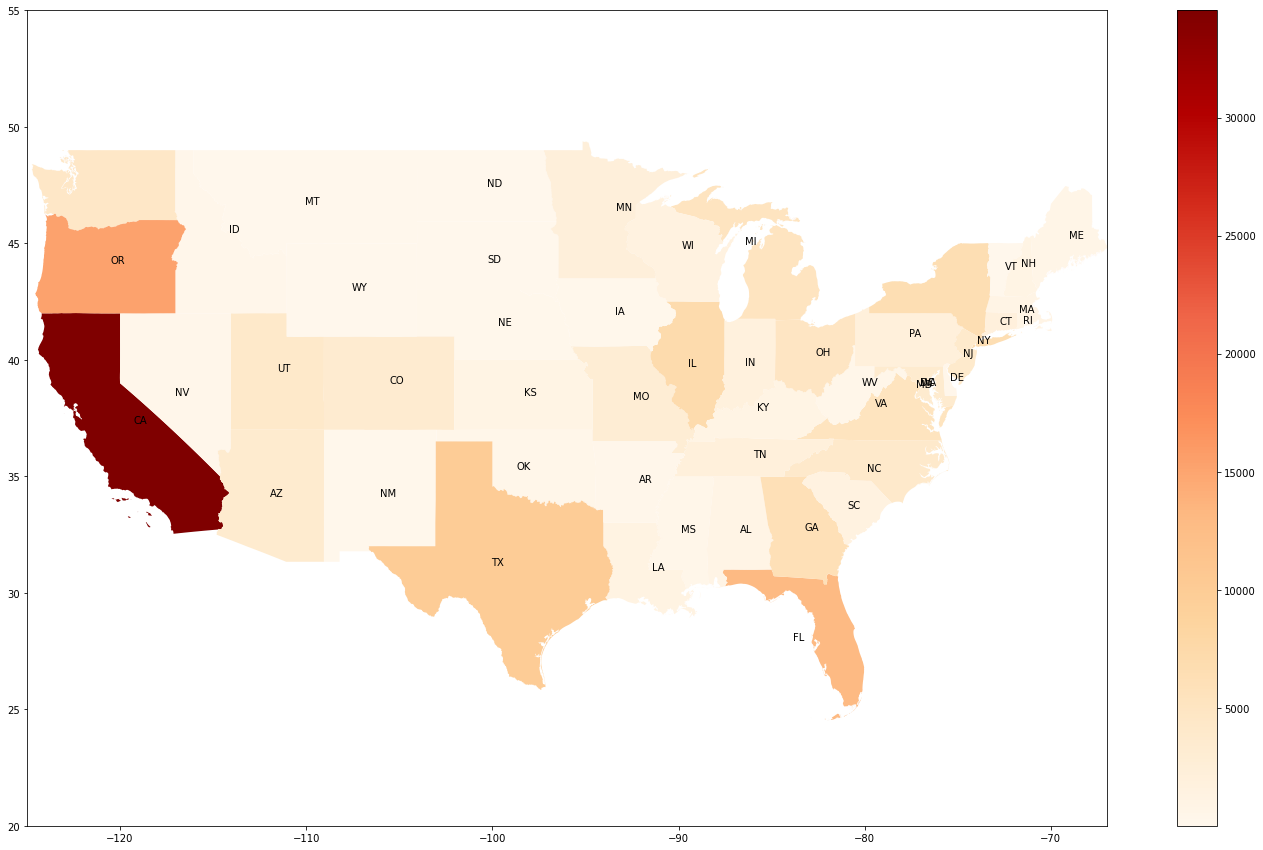

In [76]:
accident_2018_count = accident_2018_df.groupby('State').size().reset_index(name='Count')
# merge usa_state data and geo_usa shapefile
geo_merge= pd.merge(states,accident_2018_count,left_on='STUSPS', right_on='State')
geo_merge = pd.merge(geo_merge, state_coor, left_on='STUSPS', right_on='State')
geo_merge.plot(column='Count',figsize=(25, 15),legend=True,cmap='OrRd')
plt.xlim(-125,-67)
plt.ylim(20,55)
# add countries names and numbers 
for i in range(len(geo_merge)):
    plt.text(geo_merge.Longitude[i],geo_merge.Latitude[i],"{}".format(geo_merge.STUSPS[i]),size=10)
plt.show()

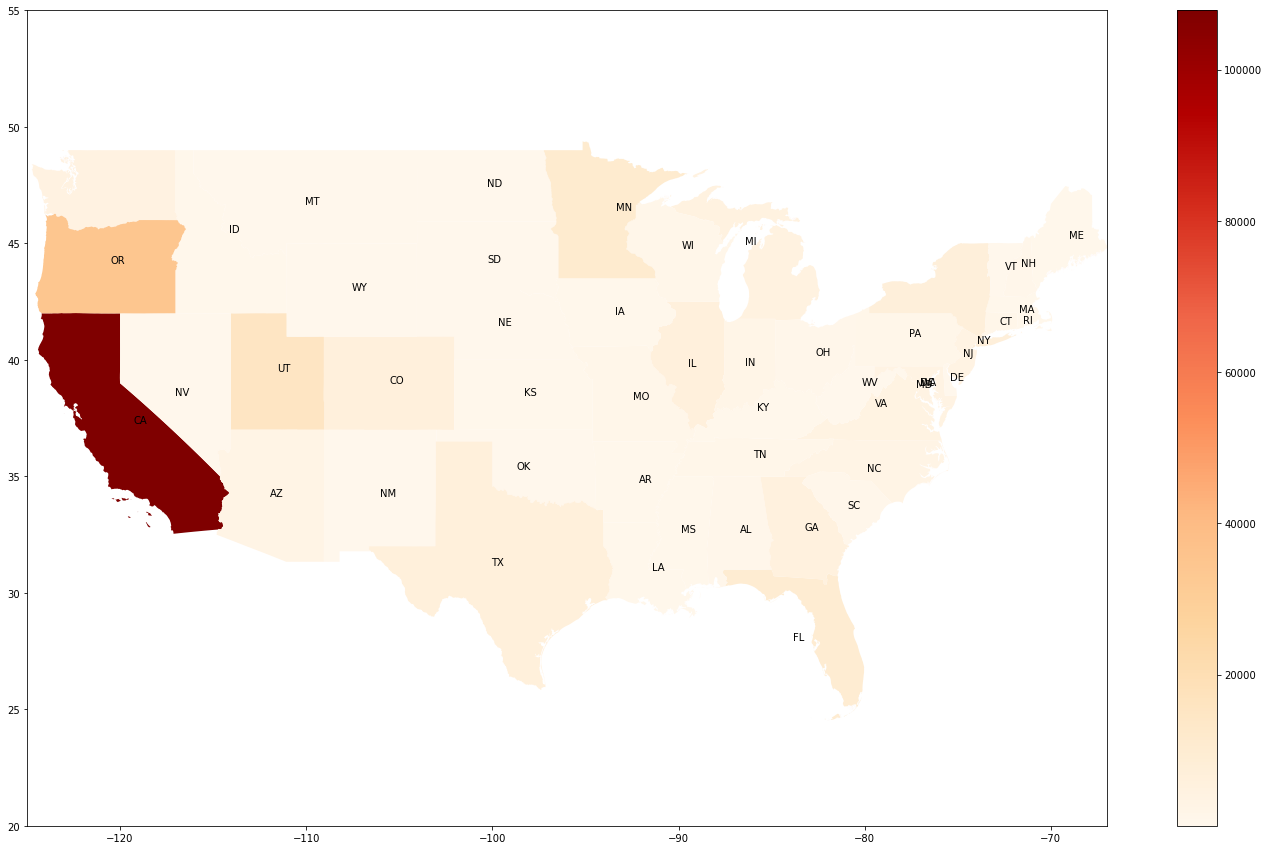

In [77]:
accident_2019_count = accident_2019_df.groupby('State').size().reset_index(name='Count')
# merge usa_state data and geo_usa shapefile
geo_merge= pd.merge(states,accident_2019_count,left_on='STUSPS', right_on='State')
geo_merge = pd.merge(geo_merge, state_coor, left_on='STUSPS', right_on='State')
geo_merge.plot(column='Count',figsize=(25, 15),legend=True,cmap='OrRd')
plt.xlim(-125,-67)
plt.ylim(20,55)
# add countries names and numbers 
for i in range(len(geo_merge)):
    plt.text(geo_merge.Longitude[i],geo_merge.Latitude[i],"{}".format(geo_merge.STUSPS[i]),size=10)
plt.show()

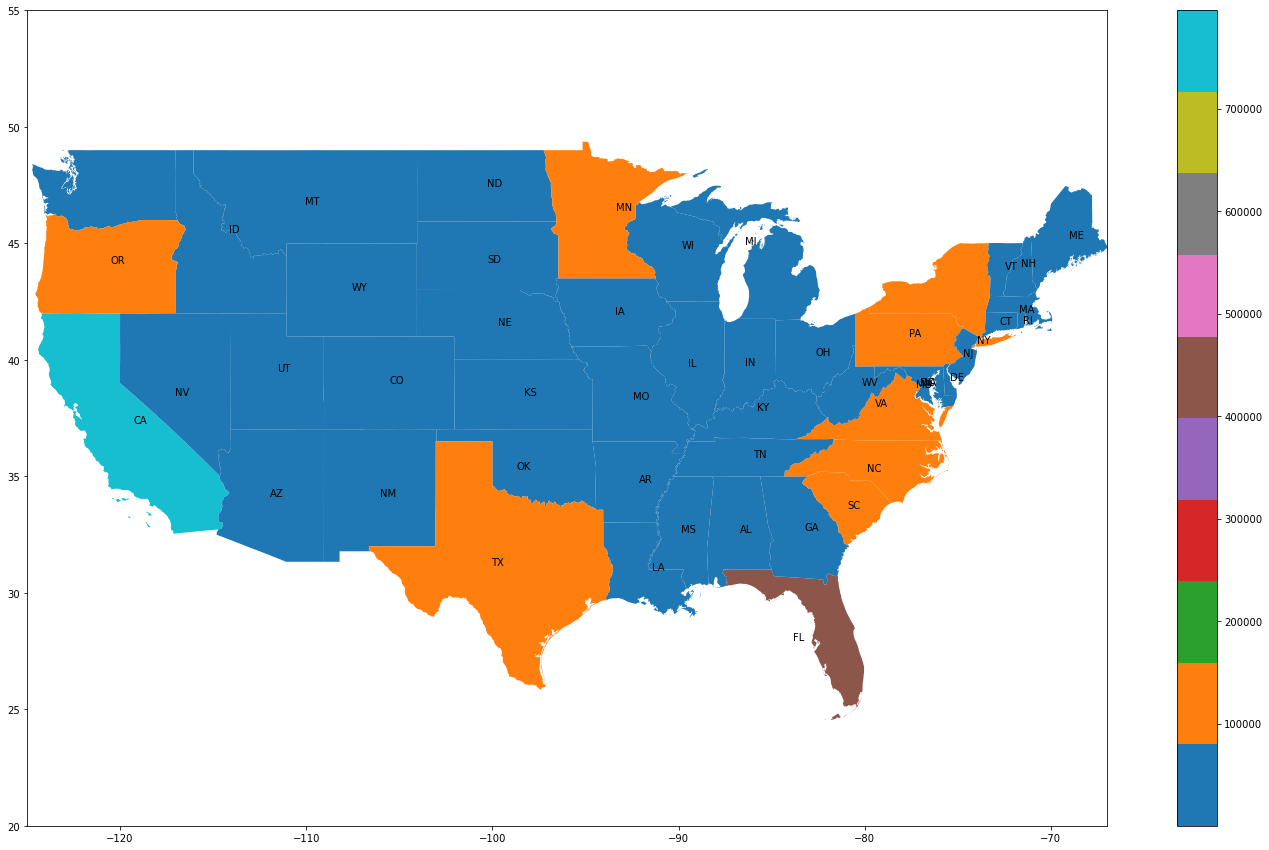

In [67]:
# merge usa_state data and geo_usa shapefile
geo_merge= pd.merge(states,accident_counts,left_on='STUSPS', right_on='State')
geo_merge = pd.merge(geo_merge, state_coor, left_on='STUSPS', right_on='State')
geo_merge.plot(column='Count',figsize=(25, 15),legend=True,cmap='tab10')
plt.xlim(-125,-67)
plt.ylim(20,55)
# add countries names and numbers 
for i in range(len(geo_merge)):
    plt.text(geo_merge.Longitude[i],geo_merge.Latitude[i],"{}".format(geo_merge.STUSPS[i]),size=10)
plt.show()

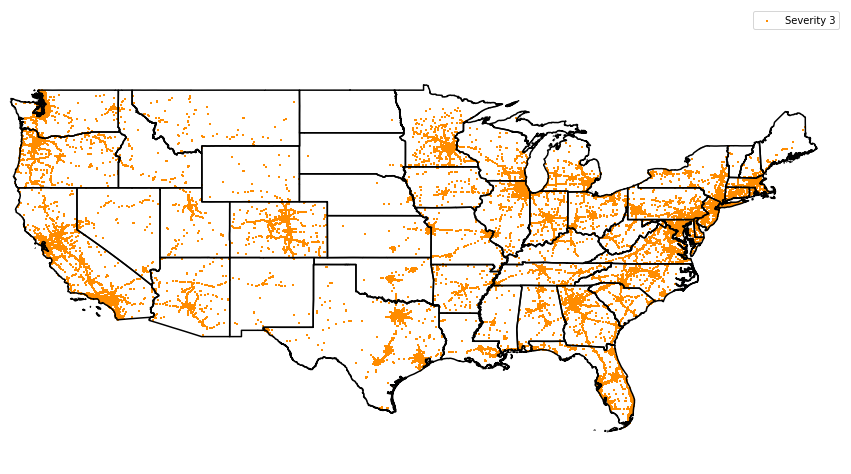

In [31]:

fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])
states.boundary.plot(ax=ax, color='black') # plot us map with the boundary 

## remove the bound of the graph
for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

## remove the ticks 
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

geometry = [Point(xy) for xy in zip(accident_df['Start_Lng'], accident_df['Start_Lat' ])] # make the given lat and lng to a point save it as geometry
geo_df = gpd.GeoDataFrame(accident_df, geometry=geometry) # put the geometry to a geo frame
# geo_df[geo_df['Severity'] == 1].plot(ax=ax, markersize=2, color='darkgreen', marker='+', label='Severity 1')
# geo_df[geo_df['Severity'] == 2].plot(ax=ax, markersize=2, color='steelblue', marker='+', label='Severity 2')
geo_df[geo_df['Severity'] == 3].plot(ax=ax, markersize=2, color='darkorange', marker='+', label='Severity 3')
# geo_df[geo_df['Severity'] == 4].plot(ax=ax, markersize=2, color='red', marker='+', label='Severity 4')

ax.legend()
plt.savefig('../plots/severity_on_map.png', transparent=True)
plt.show()

In [21]:
# avg distance for the severity 
accident_severity_distance =  pd.DataFrame(accident_df.groupby(['Severity'])['Distance(mi)'].mean().reset_index())
accident_severity_distance  = accident_severity_distance .sort_values(by='Severity')
accident_severity_distance 

,Severity,Distance(mi)
0,1,0.202797
1,2,0.674301
2,3,0.618815
3,4,1.448978


In [22]:
accident_df.groupby(['Severity']).size()

Severity
1      26053
2    2532991
3     155105
4     131193
dtype: int64

### 2. The breakdown of Accidents in each states by year

In [5]:
# Add "Year" and "Month" Columns for grouping later 
accident_df['Year'] = pd.DatetimeIndex(accident_df['Start_Time']).year  
accident_df['Month'] = pd.DatetimeIndex(accident_df['Start_Time']).month

In [14]:
accident_df['Day'] = pd.DatetimeIndex(accident_df['Start_Time']).weekday

In [16]:
yearly_accident = accident_df.groupby('Year').size().reset_index(name='Count')


,Year,Count
0,2016,122024
1,2017,163918
2,2018,163176
3,2019,258615
4,2020,625864


In [17]:
yearly_accident.to_csv('../data/output/yearly_accident.csv')

In [18]:
weekly_accident = accident_df.groupby('Day').size().reset_index(name='Count')


In [20]:
weekly_accident.to_csv('../data/output/weekly_accident.csv')

In [12]:
# get unique states code and then group them and look at each year accident (check there is no NAN)
print(accident_df['State'].unique())

['OH' 'IN' 'KY' 'WV' 'MI' 'PA' 'CA' 'NV' 'MN' 'TX' 'MO' 'CO' 'OK' 'LA'
 'KS' 'WI' 'IA' 'MS' 'NE' 'ND' 'WY' 'SD' 'MT' 'NM' 'AR' 'IL' 'NJ' 'GA'
 'FL' 'NY' 'CT' 'RI' 'SC' 'NC' 'MD' 'MA' 'TN' 'VA' 'DE' 'DC' 'ME' 'AL'
 'NH' 'VT' 'AZ' 'UT' 'ID' 'OR' 'WA']


In [103]:
# States breakdown
states_year_count = accident_df.groupby(['State', 'Year']).size().reset_index(name='Year_Count')
states_year_count


,State,Year,Year_Count
0,AL,2016,133
1,AL,2017,600
2,AL,2018,935
3,AL,2019,1036
4,AL,2020,5016
...,...,...,...
288,WY,2017,88
289,WY,2018,77
290,WY,2019,79
291,WY,2020,10


In [104]:
list_of_states_name = []
for index, row in states_year_count.iterrows():
    s = abbrev_to_us_state.get(row['State'])
    list_of_states_name.append((s))


states_year_count['State_Name'] = list_of_states_name

In [105]:
states_year_count.head()

,State,Year,Year_Count,State_Name
0,AL,2016,133,Alabama
1,AL,2017,600,Alabama
2,AL,2018,935,Alabama
3,AL,2019,1036,Alabama
4,AL,2020,5016,Alabama


In [106]:
states_year_count.to_csv('../data/output/states_year_count.csv')

In [29]:
# group by regions
states_year_count= states_year_count.sort_values(by=["Region", "State"])

In [30]:
list_of_reg = states_year_count['Region'].unique()
list_of_reg

array(['Midwest', 'Northeast', 'South', 'Southwest', 'West'], dtype=object)

In [31]:
list_of_states = accident_df['State'].unique()
count = 0

for i in range(49):
    print(states_year_count.loc[states_year_count['State'] == list_of_states[count]]['Year_Count'])


197    3801
198    4675
199    4981
200     977
201    6682
202    3293
Name: Year_Count, dtype: int64
197    3801
198    4675
199    4981
200     977
201    6682
202    3293
Name: Year_Count, dtype: int64
197    3801
198    4675
199    4981
200     977
201    6682
202    3293
Name: Year_Count, dtype: int64
197    3801
198    4675
199    4981
200     977
201    6682
202    3293
Name: Year_Count, dtype: int64
197    3801
198    4675
199    4981
200     977
201    6682
202    3293
Name: Year_Count, dtype: int64
197    3801
198    4675
199    4981
200     977
201    6682
202    3293
Name: Year_Count, dtype: int64
197    3801
198    4675
199    4981
200     977
201    6682
202    3293
Name: Year_Count, dtype: int64
197    3801
198    4675
199    4981
200     977
201    6682
202    3293
Name: Year_Count, dtype: int64
197    3801
198    4675
199    4981
200     977
201    6682
202    3293
Name: Year_Count, dtype: int64
197    3801
198    4675
199    4981
200     977
201    6682
202    3293
N

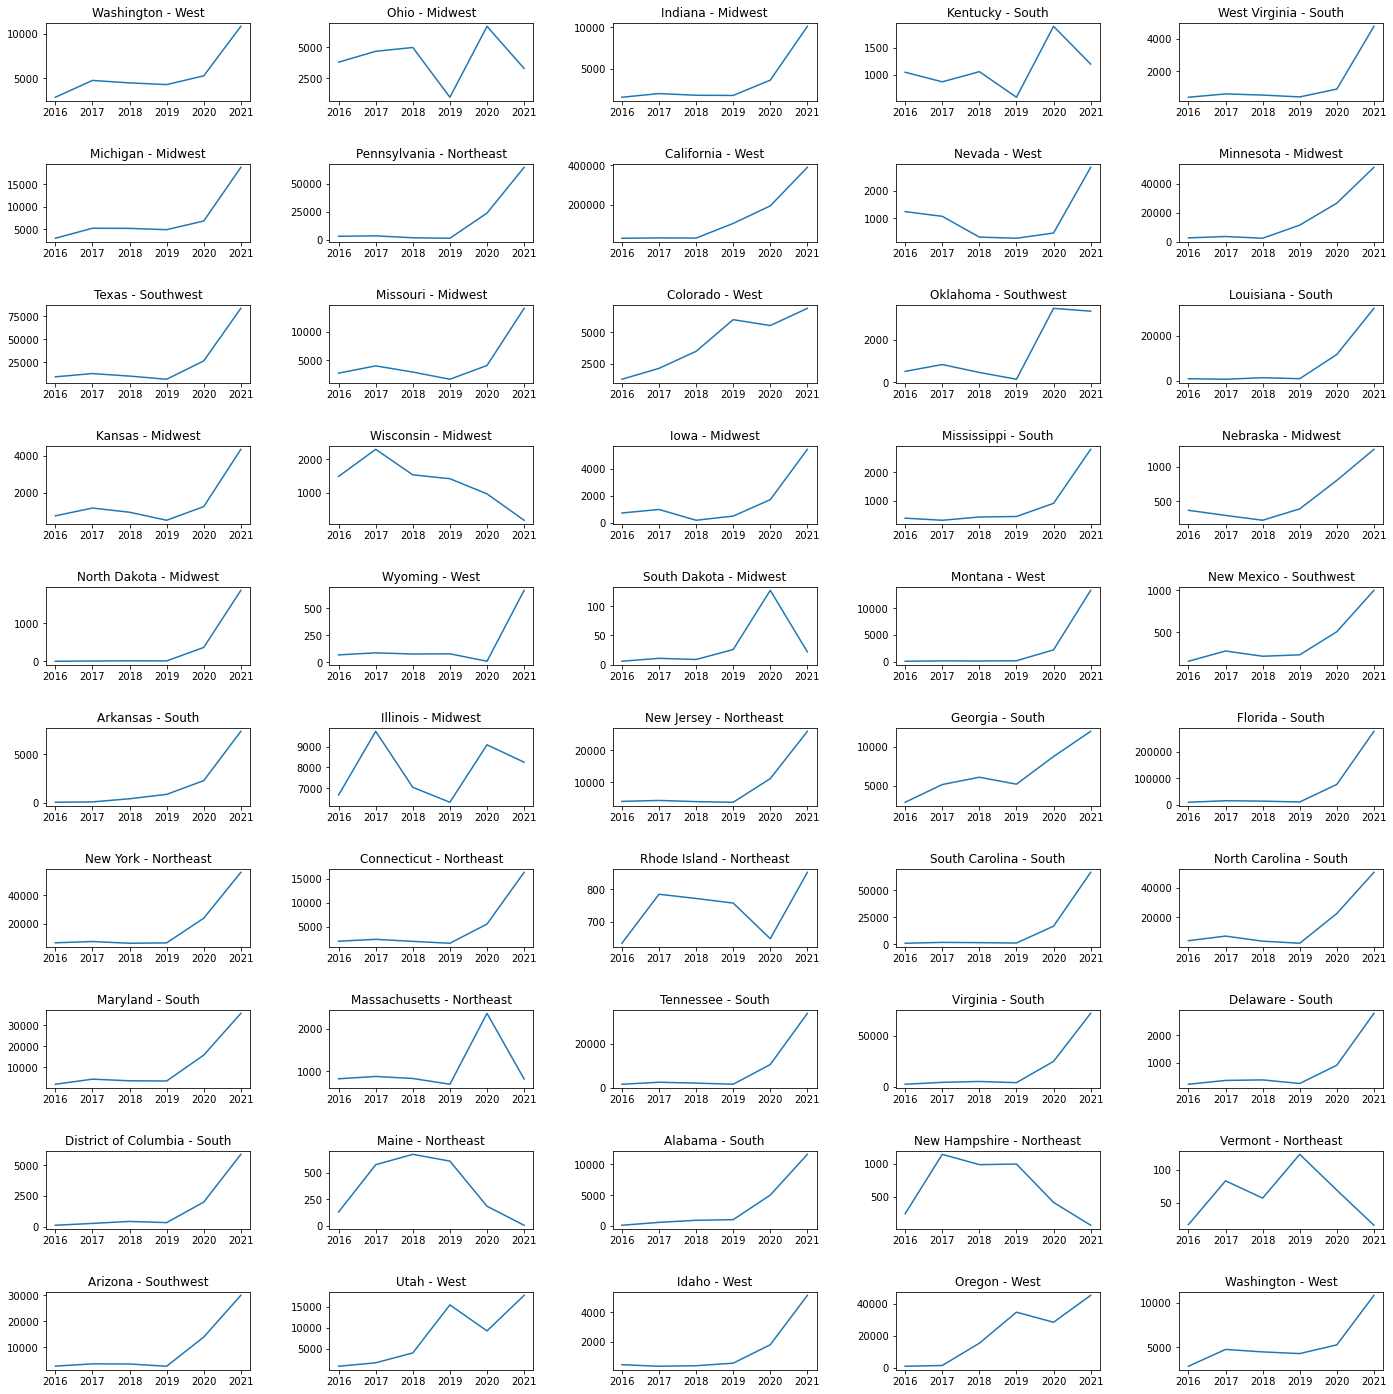

In [30]:
# small multiples in 5 columns and 10 row 
fig, axes = plt.subplots(10, 5, figsize=(20,20))

list_of_states = accident_df['State'].unique()

for i in range(10):
    for j in range(5):
        count = (j + 5*i) - 1
        x = states_year_count.loc[states_year_count['State'] == list_of_states[count]]['Year']
        y = states_year_count.loc[states_year_count['State'] == list_of_states[count]]['Year_Count']
        axes[i,j].plot(x,y)
        axes[i,j].set_title(abbrev_to_us_state.get(list_of_states[count]) + " - " +states_to_regions.get(abbrev_to_us_state.get(list_of_states[count])))

fig.tight_layout(pad=3.0)
plt.show()
plt.close()


### Small Multiples of Total accident yearly

In [80]:
states_year_count.head()

,State,Year,Year_Count
0,AL,2016,133
1,AL,2017,600
2,AL,2018,935
3,AL,2019,1036
4,AL,2020,5016


In [82]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [87]:
yearly_count = pd.pivot(states_year_count, index=['State', 'Region'], columns=['Year'], values=['Year_Count'])
yearly_count

Year_Count                                                
Year                  2016     2017     2018      2019      2020      2021
State Region                                                              
AL    South          133.0    600.0    935.0    1036.0    5016.0   11602.0
AR    South           26.0     62.0    388.0     839.0    2262.0    7358.0
AZ    Southwest     2715.0   3585.0   3539.0    2664.0   13948.0   30053.0
CA    West         33592.0  35230.0  34536.0  107841.0  195831.0  388838.0
CO    West          1286.0   2147.0   3492.0    5994.0    5531.0    6890.0
CT    Northeast     1998.0   2388.0   1967.0    1576.0    5555.0   16278.0
DC    South          144.0    293.0    453.0     356.0    2015.0    5872.0
DE    South          204.0    344.0    363.0     232.0     900.0    2799.0
FL    South         8783.0  14619.0  13064.0    9855.0   76672.0  278395.0
GA    South         2872.0   5154.0   6095.0    5199.0    8761.0   12005.0
IA    Midwest        735.0    998.0    199.0     507.0    1722.0    5446.0
ID    West           418.0    312.0    348.0     522.0    1783.0    5161.0
IL    Midwest       6677.0   9727.0   7043.0    6328.0    9083.0    8247.0
IN    Midwest       1553.0   1998.0   1795.0    1771.0    3617.0   10116.0
KS    Midwest        760.0   1181.0    954.0     520.0    1259.0    4359.0
KY    South         1044.0    866.0   1055.0     579.0    1898.0    1196.0
LA    South          798.0    561.0   1252.0     806.0   11625.0   32190.0
MA    Northeast      820.0    875.0    827.0     691.0    2363.0     816.0
MD    South         1988.0   4405.0   3636.0    3529.0   15836.0   35691.0
ME    Northeast      132.0    579.0    677.0     613.0     186.0       6.0
MI    Midwest       2975.0   5204.0   5177.0    4886.0    6819.0   18782.0
MN    Midwest       2517.0   3460.0   2253.0   11311.0   26480.0   51164.0
MO    Midwest       2756.0   4026.0   2941.0    1677.0    4097.0   14136.0
MS    South          393.0    320.0    434.0     452.0     913.0    2808.0
MT    West            59.0    127.0    105.0     153.0    2193.0   13327.0
NC    South         4276.0   7387.0   3952.0    2545.0   22683.0   50519.0
ND    Midwest          3.0      NaN     15.0      12.0     365.0    1863.0
NE    Midwest        367.0    293.0    223.0     388.0     800.0    1249.0
NH    Northeast      250.0   1139.0    985.0     994.0     420.0      78.0
NJ    Northeast     3961.0   4252.0   3882.0    3682.0   11123.0   26002.0
NM    Southwest      151.0    274.0    211.0     228.0     505.0    1001.0
NV    West          1239.0   1068.0    310.0     268.0     458.0    2854.0
NY    Northeast     6823.0   7717.0   6505.0    6752.0   24048.0   56204.0
OH    Midwest       3801.0   4675.0   4981.0     977.0    6682.0    3293.0
OK    Southwest      519.0    840.0    469.0     149.0    3481.0    3348.0
OR    West           921.0   1397.0  15358.0   34819.0   28488.0   45358.0
PA    Northeast     3404.0   3780.0   2087.0    1647.0   24107.0   64950.0
RI    Northeast      635.0    785.0    772.0     758.0     649.0     852.0
SC    South          998.0   1797.0   1558.0    1200.0   16850.0   66813.0
SD    Midwest          6.0     11.0      9.0      26.0     127.0      22.0
TN    South         1618.0   2535.0   2137.0    1629.0   10639.0   34055.0
TX    Southwest     9288.0  12833.0  10085.0    6653.0   26573.0   83605.0
UT    West           941.0   1756.0   4093.0   15435.0    9285.0   17683.0
VA    South         2611.0   4488.0   5330.0    4181.0   24985.0   71940.0
VT    Northeast       17.0     83.0     57.0     123.0      69.0      16.0
WA    West          2861.0   4762.0   4484.0    4293.0    5279.0   10875.0
WI    Midwest       1489.0   2293.0   1535.0    1421.0     971.0     187.0
WV    South          398.0    604.0    533.0     419.0     902.0    4776.0
WY    West            69.0     88.0     77.0      79.0      10.0     667.0

In [88]:
yearly_count.columns = yearly_count.columns.droplevel(0)

In [89]:
yearly_count = yearly_count.reset_index()

In [90]:
yearly_count.rename(columns = {'Year':'index'}, inplace = True)

In [91]:
yearly_count.head()

Year,State,Region,2016,2017,2018,2019,2020,2021
0,AL,South,133.0,600.0,935.0,1036.0,5016.0,11602.0
1,AR,South,26.0,62.0,388.0,839.0,2262.0,7358.0
2,AZ,Southwest,2715.0,3585.0,3539.0,2664.0,13948.0,30053.0
3,CA,West,33592.0,35230.0,34536.0,107841.0,195831.0,388838.0
4,CO,West,1286.0,2147.0,3492.0,5994.0,5531.0,6890.0


In [93]:
list_of_states_name = []
for index, row in yearly_count.iterrows():
    s = abbrev_to_us_state.get(row['State'])
    list_of_states_name.append((s))


yearly_count['State_Name'] = list_of_states_name

In [95]:
yearly_count.to_csv('../data/output/yearly_count.csv')

In [92]:
df = pd.merge(states, yearly_count, left_on='code', right_on='State')
df.head()

KeyError: 'code'

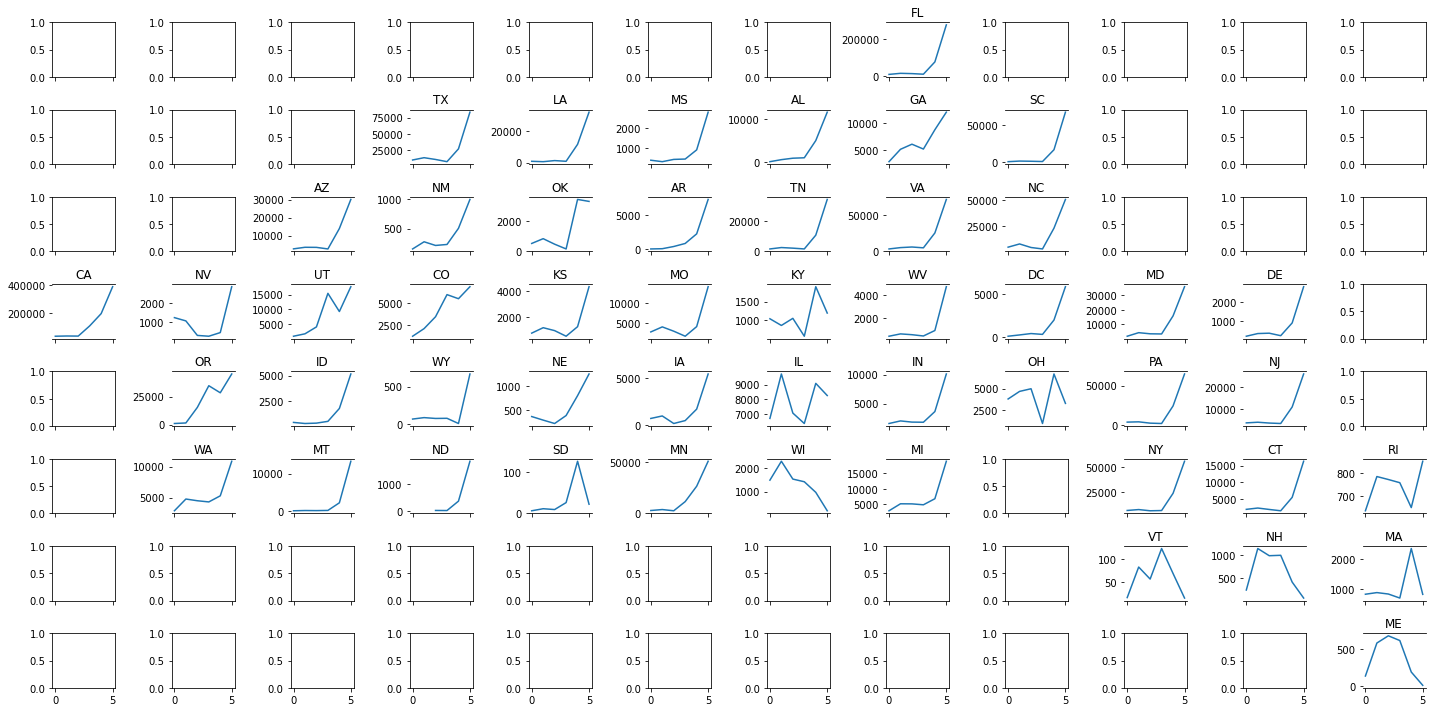

In [109]:
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as mcolors


fig, axs = plt.subplots(8,12,figsize=(20, 10),sharex=True)

for _, state in df.iterrows():
    x = range(6)
    y = state[6:]
    axs[state.row,state.column].plot(x,y) 
    axs[state.row,state.column].set_title(state.code)
    axs[state.row,state.column].spines['right'].set_visible(False)
    axs[state.row,state.column].spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('../plots/breakdowns.svg')
plt.show()

#### No of Accident with No of Registered Vehicles

In [ ]:
# no of cars in 2020
cars_df = pd.read_csv('../data/cars_2020.csv')
drivers_df = pd.read_csv('../data/drivers_2020.csv')

In [ ]:
cars_df['State_Codes'] = cars_df['State'].apply(lambda s: us_state_to_abbrev.get(s))
drivers_df['State_Codes'] = drivers_df['State'].apply(lambda s: us_state_to_abbrev.get(s))

In [ ]:
# accident in 2020
accident_2020_df = accident_df.loc[accident_df['Year'] == 2020]
print("Accident Count in 2020: " + str(len(accident_2020_df)))
print("Registered Cars in 2020: " + str(sum(cars_df[' No_of_cars'])))
print("Registered License in 2020: " + str(sum(drivers_df[' No_of_drivers'])))

Accident Count in 2020: 625864
Registered Cars in 2020: 105143990
Registered License in 2020: 228195802


In [ ]:
accident_2020_State = accident_2020_df.groupby(['State']).size().reset_index(name="Accident_Count")
accident_2020_State = accident_2020_State.sort_values(by='Accident_Count', ascending=False)
accident_2020_State

,State,Accident_Count
3,CA,195831
8,FL,76672
35,OR,28488
41,TX,26573
21,MN,26480
43,VA,24985
36,PA,24107
32,NY,24048
25,NC,22683
38,SC,16850


In [ ]:
# merging the accident count with the no of vehicles
accident_2020_State = pd.merge(accident_2020_State, cars_df , left_on='State', right_on='State_Codes')
accident_2020_State.head()


,State_x,Accident_Count,State_y,No_of_cars,State_Codes
0,CA,195831,California,14201400,CA
1,FL,76672,Florida,7841553,FL
2,OR,28488,Oregon,1440848,OR
3,TX,26573,Texas,8088058,TX
4,MN,26480,Minnesota,1841690,MN


In [ ]:
accident_2020_State = pd.merge(accident_2020_State, drivers_df , on='State_Codes')
accident_2020_State.head()

,State_x,Accident_Count,State_y,No_of_cars,State_Codes,State,No_of_drivers
0,CA,195831,California,14201400,CA,California,27005302
1,FL,76672,Florida,7841553,FL,Florida,15715373
2,OR,28488,Oregon,1440848,OR,Oregon,2944828
3,TX,26573,Texas,8088058,TX,Texas,17667039
4,MN,26480,Minnesota,1841690,MN,Minnesota,4090264


In [ ]:
accident_2020_State.drop(['State_x', 'State_y'], inplace=True, axis=1)
accident_2020_State.head()

,Accident_Count,No_of_cars,State_Codes,State,No_of_drivers
0,195831,14201400,CA,California,27005302
1,76672,7841553,FL,Florida,15715373
2,28488,1440848,OR,Oregon,2944828
3,26573,8088058,TX,Texas,17667039
4,26480,1841690,MN,Minnesota,4090264


In [ ]:
# calculate the accident per vehicle
accident_2020_State['accident_per_car'] = accident_2020_State['Accident_Count']/ accident_2020_State[' No_of_cars']

In [ ]:
accident_2020_State = accident_2020_State.sort_values(by=['Accident_Count', 'accident_per_car'], ascending=False)
accident_2020_State

,Accident_Count,No_of_cars,State_Codes,State,No_of_drivers,accident_per_car
0,195831,14201400,CA,California,27005302,0.013790
1,76672,7841553,FL,Florida,15715373,0.009778
2,28488,1440848,OR,Oregon,2944828,0.019772
3,26573,8088058,TX,Texas,17667039,0.003285
4,26480,1841690,MN,Minnesota,4090264,0.014378
5,24985,3057254,VA,Virginia,5909716,0.008172
6,24107,4043715,PA,Pennsylvania,8930677,0.005962
7,24048,4232748,NY,New York,12194360,0.005681
8,22683,3398470,NC,North Carolina,7637400,0.006674
9,16850,1767348,SC,South Carolina,3905911,0.009534


In [ ]:
# correlation between accident count and no_of_cars
accident_2020_State[' No_of_cars'].corr(accident_2020_State['Accident_Count'])

0.8745354792974783

In [ ]:
# correlation between no of drivers and accident count
accident_2020_State['Accident_Count'].corr(accident_2020_State[' No_of_drivers'])

0.8356436379532006

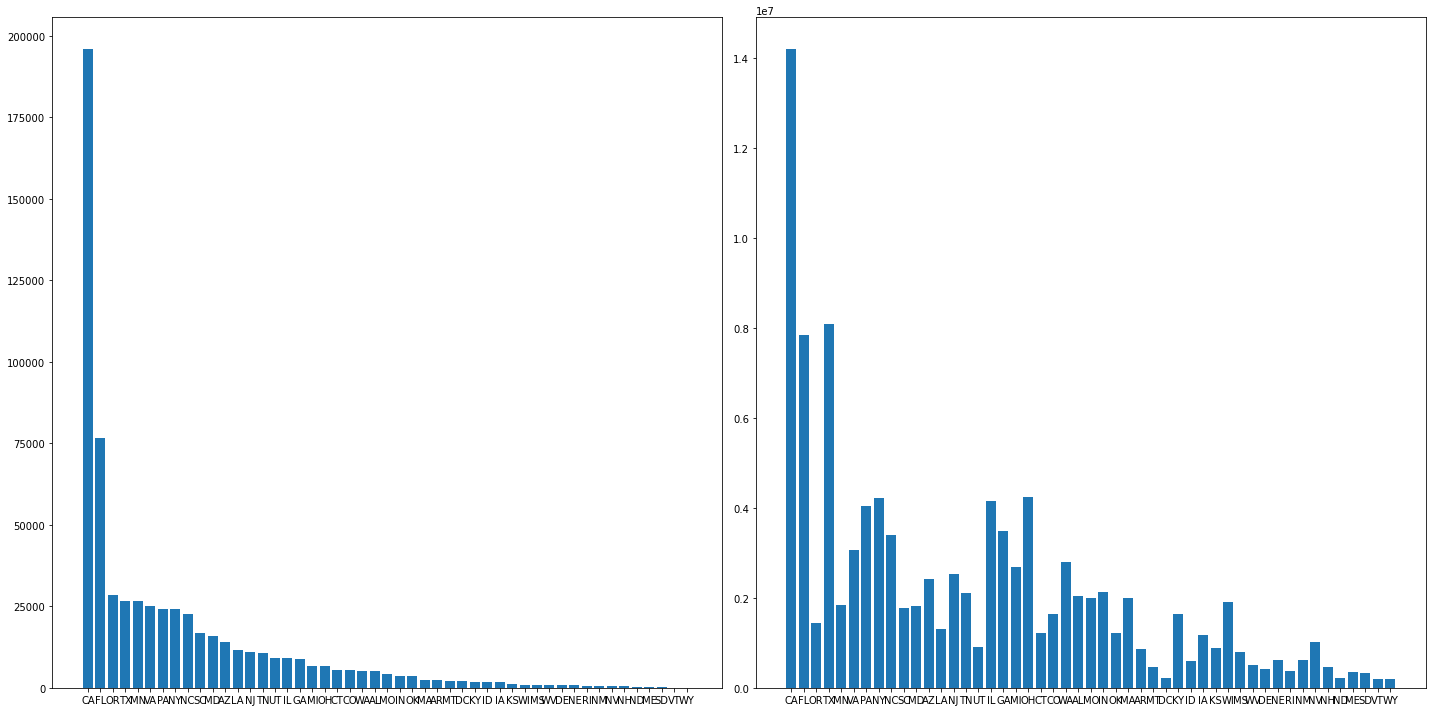

In [ ]:
# bar plot of accident count and no of vehicle
accident_2020_fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(20,10))

ax3.bar(accident_2020_State['State_Codes'], accident_2020_State['Accident_Count'])
ax4.bar(accident_2020_State['State_Codes'], accident_2020_State[' No_of_cars'])
plt.tight_layout()
plt.show()

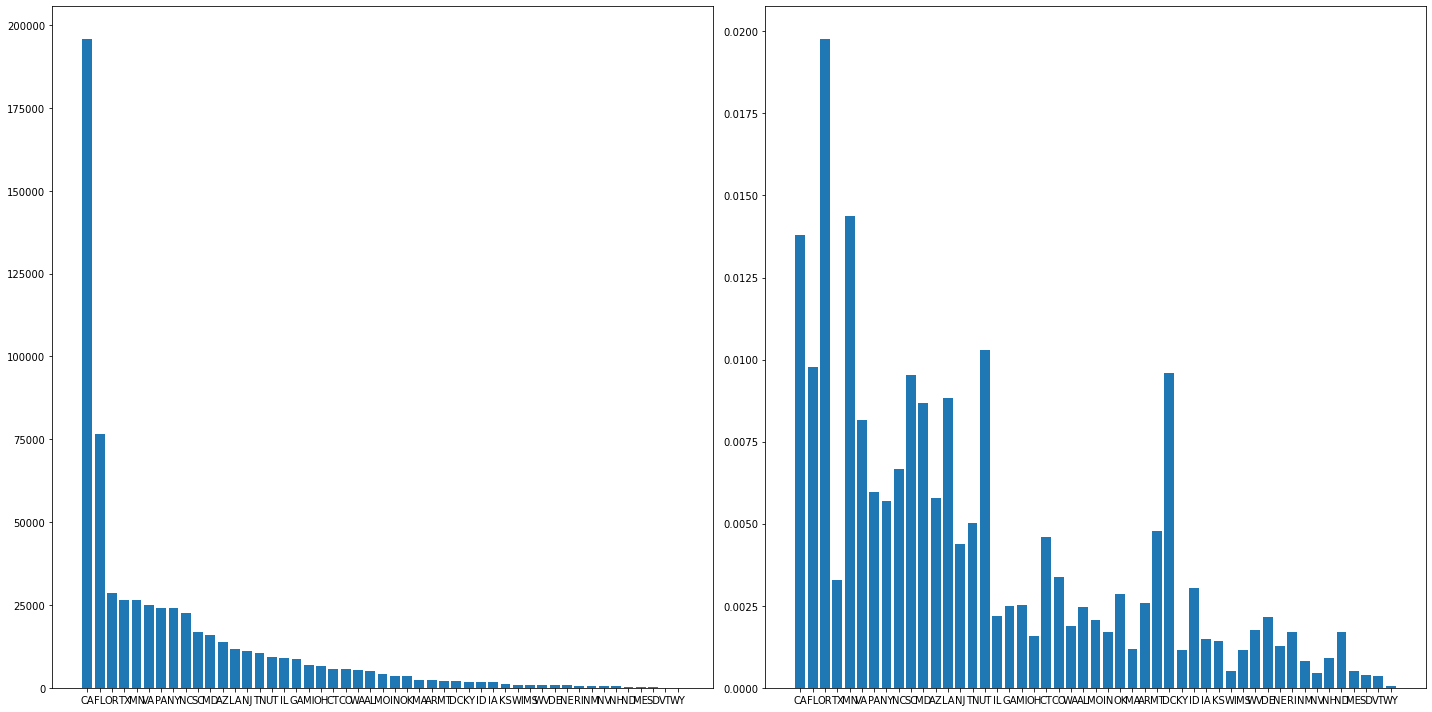

In [ ]:
# bar plot of accident count 
accident_2020_fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(20,10))

ax3.bar(accident_2020_State['State_Codes'], accident_2020_State['Accident_Count'])
ax4.bar(accident_2020_State['State_Codes'], accident_2020_State['accident_per_car'])
plt.tight_layout()
plt.show()

#### No of Accident with Vehicle Density

In [ ]:
land_area_df = pd.read_csv('../data/US_States_Land_Area.csv')
land_area_df.head()

,State,Land_Area(sq.km.)
0,Alabama,131171
1,Alaska,1477953
2,Arizona,294207
3,Arkansas,134771
4,California,403466


In [ ]:
land_area_df['State_Codes'] = land_area_df['State'].apply(lambda s: us_state_to_abbrev.get(s))
land_area_df

,State,Land_Area(sq.km.),State_Codes
0,Alabama,131171,AL
1,Alaska,1477953,AK
2,Arizona,294207,AZ
3,Arkansas,134771,AR
4,California,403466,CA
5,Connecticut,12542,CT
6,Delaware,5047,DE
7,District of Columbia,158,DC
8,Florida,13887,FL
9,Georgia,148959,GA


In [ ]:
accident_2020_State = pd.merge(accident_2020_State, land_area_df , on='State_Codes')
accident_2020_State.head()

,Accident_Count,No_of_cars,State_Codes,State_x,No_of_drivers,accident_per_car,State_y,Land_Area(sq.km.)
0,195831,14201400,CA,California,27005302,0.013790,California,403466
1,76672,7841553,FL,Florida,15715373,0.009778,Florida,13887
2,28488,1440848,OR,Oregon,2944828,0.019772,Oregon,248608
3,26573,8088058,TX,Texas,17667039,0.003285,Texas,676587
4,26480,1841690,MN,Minnesota,4090264,0.014378,Minnesota,206232


In [ ]:
accident_2020_State.drop(['State_x'], inplace=True, axis=1)
accident_2020_State.head()

,Accident_Count,No_of_cars,State_Codes,No_of_drivers,accident_per_car,State_y,Land_Area(sq.km.)
0,195831,14201400,CA,27005302,0.013790,California,403466
1,76672,7841553,FL,15715373,0.009778,Florida,13887
2,28488,1440848,OR,2944828,0.019772,Oregon,248608
3,26573,8088058,TX,17667039,0.003285,Texas,676587
4,26480,1841690,MN,4090264,0.014378,Minnesota,206232


In [ ]:
accident_2020_State.rename(columns = {'State_y':'State'}, inplace = True)
accident_2020_State.head()

,Accident_Count,No_of_cars,State_Codes,No_of_drivers,accident_per_car,State,Land_Area(sq.km.)
0,195831,14201400,CA,27005302,0.013790,California,403466
1,76672,7841553,FL,15715373,0.009778,Florida,13887
2,28488,1440848,OR,2944828,0.019772,Oregon,248608
3,26573,8088058,TX,17667039,0.003285,Texas,676587
4,26480,1841690,MN,4090264,0.014378,Minnesota,206232


In [ ]:
accident_2020_State['Vehicle_Density'] = accident_2020_State[' No_of_cars']/ accident_2020_State['Land_Area(sq.km.)']

In [ ]:
accident_2020_State.drop(['Vehicle Density'], axis=1)

KeyError: "['Vehicle Density'] not found in axis"

In [ ]:
accident_2020_State['Accident_Count'].corr(accident_2020_State['Vehicle_Density'])

0.07968622814469714

### 3. Monthly breakdown of accident

In [24]:
monthly_accident_count = accident_df.groupby(accident_df['Month']).size().reset_index(name="Monthly_Count")
monthly_accident_count

,Month,Monthly_Count
0,1,198365
1,2,194995
2,3,158224
3,4,171880
4,5,181944
5,6,226561
6,7,159111
7,8,178670
8,9,241822
9,10,299131


In [25]:
monthly_accident_count.to_csv('../data/output/monthly_accident.csv')

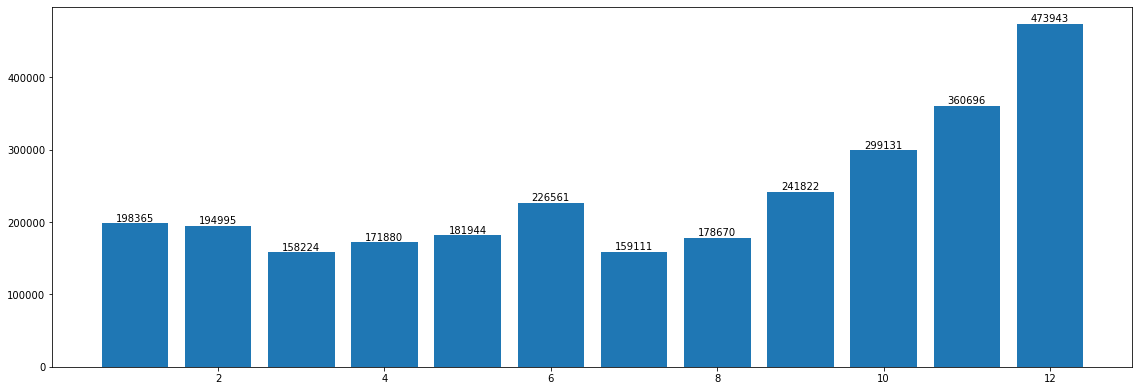

In [ ]:
import matplotlib.dates as mdates

total_monthly_accident_fig = plt.figure(figsize=(15,5))
ax2 = total_monthly_accident_fig.add_axes([0,0,1,1])
bars = ax2.bar(monthly_accident_count['Month'], monthly_accident_count['Monthly_Count'], width = 0.8)
ax2.bar_label(bars)
plt.savefig('../plots/monthly_accident_count.svg')
plt.show()

#### How bad each month?

### 4. Daily breakdown of accident


In [26]:
accident_df['Hours'] = pd.DatetimeIndex(accident_df['Start_Time']).hour

In [27]:
hourly_accident_count = accident_df.groupby(accident_df['Hours']).size().reset_index(name="Hourly_Count")
hourly_accident_count

,Hours,Hourly_Count
0,0,68800
1,1,59370
2,2,55443
3,3,48656
4,4,51805
5,5,80303
6,6,111160
7,7,135191
8,8,130879
9,9,108779


In [28]:
hourly_accident_count.to_csv('../data/output/daily_accident.csv')

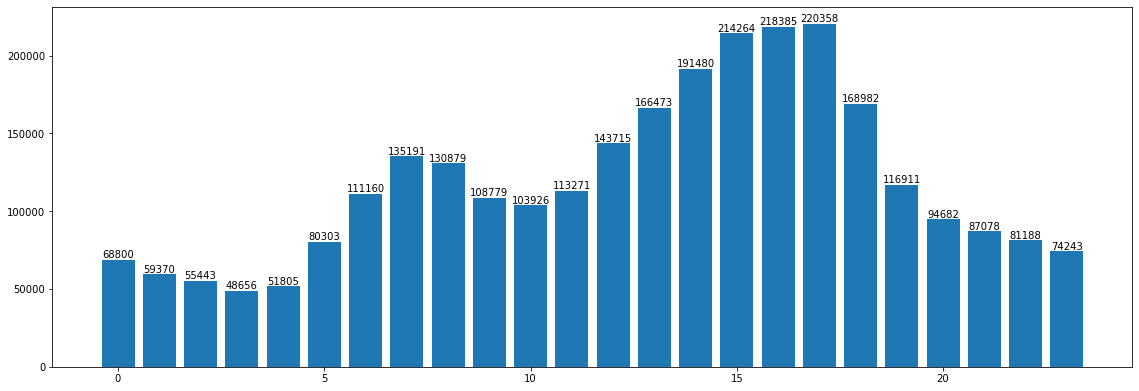

In [ ]:
total_hourly_accident_fig = plt.figure(figsize=(15,5))
ax8 = total_hourly_accident_fig.add_axes([0,0,1,1])
bars = plt.bar(hourly_accident_count['Hours'], hourly_accident_count['Hourly_Count'], width = 0.8)
ax8.bar_label(bars)
plt.savefig('../plots/hourly_accident_count.svg')
plt.show()

In [ ]:
accident_serverity_month = pd.DataFrame(accident_df.groupby(['Month'])['Severity'].mean().reset_index())

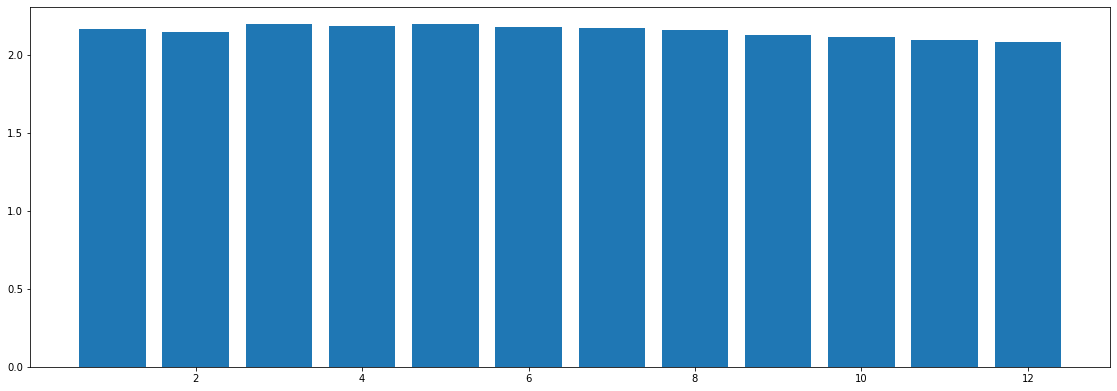

In [ ]:
serverity_monthly_accident_fig = plt.figure(figsize=(15,5))
ax10 = serverity_monthly_accident_fig.add_axes([0,0,1,1])
plt.bar(accident_serverity_month['Month'], accident_serverity_month['Severity'], width = 0.8)
plt.show()

#### How bad at each hour?

In [ ]:
accident_serverity_hour = pd.DataFrame(accident_df.groupby(['Hours'])['Severity'].mean().reset_index())
accident_serverity_hour 

,Hours,Severity
0,0,2.184840
1,1,2.141705
2,2,2.156774
3,3,2.188363
4,4,2.187183
5,5,2.167080
6,6,2.150369
7,7,2.144277
8,8,2.151040
9,9,2.160610


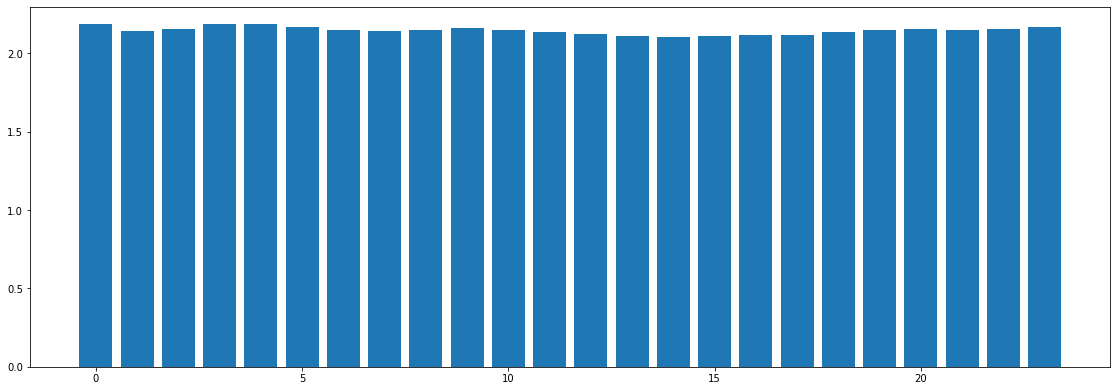

In [ ]:
serverity_hourly_accident_fig = plt.figure(figsize=(15,5))
ax9 = serverity_hourly_accident_fig.add_axes([0,0,1,1])
plt.bar(accident_serverity_hour ['Hours'], accident_serverity_hour ['Severity'], width = 0.8)
plt.show()

### 5. Does the weather condition effect the serverity and no of accident for each states? 

In [ ]:
# an increase of accident starting September till December 
# What cause the increase? Road Condition or weather condition? 

In [21]:
# weather condition breakdown for each month (grouped barchart)

# distribution of weather Condition
weather_conditions = accident_df.groupby(accident_df['Weather_Condition']).size().reset_index(name='Weather_Counts')
weather_conditions = weather_conditions.sort_values(by='Weather_Counts', ascending=False)
weather_conditions.head(20)

# most of the accident happend on a Fair day

,Weather_Condition,Weather_Counts
15,Fair,1107194
76,Mostly Cloudy,363959
7,Cloudy,348767
81,Partly Cloudy,249939
6,Clear,173823
56,Light Rain,128403
79,Overcast,84882
94,Scattered Clouds,45132
64,Light Snow,43752
17,Fog,41226


In [22]:
weather_conditions.head(10).to_csv('../data/weather_conditions.csv')

In [119]:
# group the weather condition with the highest month 
dec_accidents = accident_df.loc[accident_df['Month'] == 12]
dec_weather_conditions = dec_accidents.groupby(dec_accidents['Weather_Condition']).size().reset_index(name="weather_counts")
dec_weather_conditions = dec_weather_conditions.sort_values(by='weather_counts', ascending=False)
dec_weather_conditions

            Weather_Condition  weather_counts
10                       Fair          172862
6                      Cloudy           79723
52              Mostly Cloudy           56630
57              Partly Cloudy           32875
36                 Light Rain           25409
..                        ...             ...
16                       Hail               1
39  Light Rain Shower / Windy               1
40         Light Rain Showers               1
47         Light Snow Showers               1
0                Blowing Dust               1

[88 rows x 2 columns]


In [12]:
accident_df_clean = accident_df.dropna(subset=['Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition'])

In [13]:
print("Percentage of null : " + str((accident_df.isnull().sum()/ len(accident_df))*100))

Percentage of null : ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   61.290031
Street                    0.000070
Side                      0.000000
City                      0.004815
County                    0.000000
State                     0.000000
Zipcode                   0.046356
Country                   0.000000
Timezone                  0.128596
Airport_Code              0.335601
Weather_Timestamp         1.783125
Temperature(F)            2.434646
Wind_Chill(F)            16.505678
Humidity(%)               2.568830
Pressure(in)              2.080593
Visibility(mi)            2.479350
Wind_Direction            2.592834
Wind_Speed(mph)           5.550967

#### One hot Encoding - weather conditions 


In [14]:
accident_df_clean.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,Night,Night,Night,Night,2016,2
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,Day,Day,Day,Day,2016,2
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,False,False,False,False,Day,Day,Day,Day,2016,2
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,At I-71/Exit 26 - Accident.,...,False,False,False,False,Day,Day,Day,Day,2016,2
10,A-11,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,...,False,False,False,False,Day,Day,Day,Day,2016,2


In [130]:
classification_df = accident_df_clean[['Severity','Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]
classification_df.head()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,3,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain
4,3,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain
7,2,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow
9,2,32.0,28.7,100.0,29.59,0.5,West,3.5,0.05,Snow
10,2,33.8,29.6,100.0,29.66,3.0,NNW,4.6,0.03,Light Snow


In [135]:
classification_df.groupby('Visibility(mi)').size().reset_index()

,Visibility(mi),0
0,0.00,2965
1,0.06,105
2,0.10,47
3,0.12,678
4,0.19,5
5,0.20,815
6,0.25,10837
7,0.38,97
8,0.40,2
9,0.50,10267


In [136]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['V1', 'V2', 'V3', 'V4', 'V5']
classification_df['v_rank'] = pd.cut(x = classification_df['Visibility(mi)'], bins = bins, labels = labels, include_lowest = True)

/Users/kaixuanchin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
classification_df['v_rank'].value_counts()

V1    2207857
V2       1102
V4        234
V3        207
V5         46
Name: v_rank, dtype: int64

In [152]:
2207857/2209446

0.9992808151907764

In [142]:
low_visibility = classification_df[classification_df['v_rank'] == 'V1']
low_visibility

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,v_rank
0,3,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,V1
4,3,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,V1
7,2,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,V1
9,2,32.0,28.7,100.0,29.59,0.5,West,3.5,0.05,Snow,V1
10,2,33.8,29.6,100.0,29.66,3.0,NNW,4.6,0.03,Light Snow,V1
...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,V1
2845338,2,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,V1
2845339,2,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,V1
2845340,2,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,V1


In [153]:
low_visibility.groupby('Severity').size().reset_index()

,Severity,0
0,1,23544
1,2,2057820
2,3,64056
3,4,62437


In [154]:
high_severity_condition = low_visibility[low_visibility['Severity'] == 4]

In [151]:
high_visibility = classification_df[classification_df['v_rank'] == 'V2']
high_visibility

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,v_rank
230531,2,79.0,79.0,15.0,29.57,40.0,NW,20.0,0.0,Partly Cloudy,V2
232924,2,41.0,34.0,93.0,29.58,25.0,WNW,13.0,0.0,Cloudy,V2
237591,2,66.0,66.0,37.0,29.67,25.0,SE,25.0,0.0,Mostly Cloudy / Windy,V2
237879,2,45.0,45.0,87.0,29.87,25.0,CALM,0.0,0.0,Fair,V2
239640,2,48.0,42.0,30.0,24.24,30.0,WNW,17.0,0.0,Partly Cloudy,V2
...,...,...,...,...,...,...,...,...,...,...,...
2843105,3,93.0,93.0,11.0,24.43,30.0,NNE,7.0,0.0,Mostly Cloudy,V2
2843567,3,72.0,72.0,27.0,24.50,25.0,CALM,0.0,0.0,Mostly Cloudy,V2
2844864,2,93.0,93.0,23.0,29.49,40.0,WNW,7.0,0.0,Partly Cloudy,V2
2844865,2,93.0,93.0,23.0,29.49,40.0,WNW,7.0,0.0,Partly Cloudy,V2


In [148]:
low_visibilty_weather = low_visibility.groupby('Weather_Condition').size().reset_index(name='Count')
low_visibilty_weather = low_visibilty_weather.sort_values(by='Count', ascending=False)
low_visibilty_weather.to_csv('../data/low_visibility.csv')

In [16]:
#categorical data
categorical_cols = ['Wind_Direction', 'Weather_Condition' ] 

#import pandas as pd
X_encoded = pd.get_dummies(classification_df, columns = categorical_cols)
X_encoded

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Wind_Direction_CALM,Wind_Direction_E,...,Weather_Condition_Thunder and Hail,Weather_Condition_Thunder and Hail / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Tornado,Weather_Condition_Widespread Dust,Weather_Condition_Widespread Dust / Windy,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy
0,3,42.1,36.1,58.0,29.76,10.0,10.4,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,37.0,29.8,93.0,29.69,10.0,10.4,0.01,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,33.1,30.0,92.0,29.63,0.5,3.5,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,32.0,28.7,100.0,29.59,0.5,3.5,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2,33.8,29.6,100.0,29.66,3.0,4.6,0.03,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,28.92,10.0,13.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2845338,2,70.0,70.0,73.0,29.39,10.0,6.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2845339,2,73.0,73.0,64.0,29.74,10.0,10.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2845340,2,71.0,71.0,81.0,29.62,10.0,8.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Split into training and test set

In [17]:
y = X_encoded[['Severity']]
X_encoded = X_encoded.drop('Severity', axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

#### Logistic Regression

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred2 = dt.predict(X_test)
acc2 = accuracy_score(y_test,y_pred2)

In [21]:
print(acc2)

0.9110912088303951


Feature: 0, Score: 0.10794
Feature: 1, Score: 0.11077
Feature: 2, Score: 0.18193
Feature: 3, Score: 0.23219
Feature: 4, Score: 0.03514
Feature: 5, Score: 0.09595
Feature: 6, Score: 0.01923
Feature: 7, Score: 0.00395
Feature: 8, Score: 0.00795
Feature: 9, Score: 0.00652
Feature: 10, Score: 0.00748
Feature: 11, Score: 0.00065
Feature: 12, Score: 0.00918
Feature: 13, Score: 0.00609
Feature: 14, Score: 0.00609
Feature: 15, Score: 0.00858
Feature: 16, Score: 0.00893
Feature: 17, Score: 0.00096
Feature: 18, Score: 0.01000
Feature: 19, Score: 0.00819
Feature: 20, Score: 0.00878
Feature: 21, Score: 0.00887
Feature: 22, Score: 0.00906
Feature: 23, Score: 0.00062
Feature: 24, Score: 0.00575
Feature: 25, Score: 0.00024
Feature: 26, Score: 0.01037
Feature: 27, Score: 0.00846
Feature: 28, Score: 0.00876
Feature: 29, Score: 0.00072
Feature: 30, Score: 0.00001
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00001
Feature: 35, Score: 0.00000
Fe

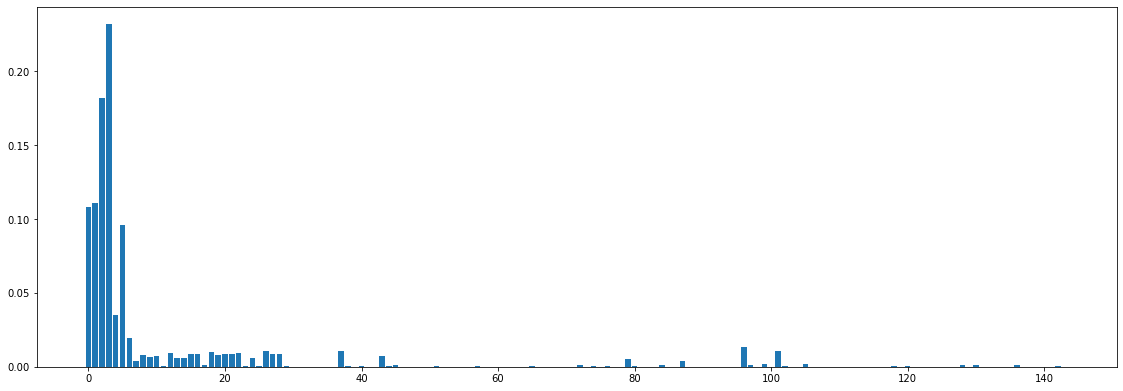

In [115]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

dt_features = plt.figure(figsize=(15,5))
ax9 = dt_features.add_axes([0,0,1,1])
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
acc = accuracy_score(y_test,y_pred)

/Users/kaixuanchin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kaixuanchin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
print(acc)

0.9316708680899388


### Does the weather condition effect the no of accident? 

### Where does the accident happends? Road or Highways


In [24]:
import re

interstate_accident_df = accident_df[accident_df['Street'].str.contains('^I-')==True]
interstate_accident_df['Street'].head()


1    I-70 E
2    I-75 S
3    I-77 N
4    I-75 S
6    I-75 S
Name: Street, dtype: object

In [25]:
# only 27% of accident on interstate highway
(len(interstate_accident_df)/len(accident_df)) *100 

27.620124399808528

In [26]:
interstate_accident_df = accident_df[accident_df['Street'].str.contains('^I-')==True]
interstate_accident_df['Street'].head()

1    I-70 E
2    I-75 S
3    I-77 N
4    I-75 S
6    I-75 S
Name: Street, dtype: object

In [27]:
# which highway has the highest number of accident
interstate_accident_count = interstate_accident_df.groupby('Street').size().reset_index(name='Count')
interstate_accident_count = interstate_accident_count.sort_values('Count', ascending=False)
interstate_accident_count.head(20)

,Street,Count
528,I-95 N,39853
309,I-5 N,39402
529,I-95 S,36425
310,I-5 S,30229
0,I-10 E,26164
1,I-10 W,25298
467,I-80 W,17545
466,I-80 E,16873
230,I-405 N,13708
18,I-15 N,12675


In [28]:
cali_accident = accident_df[accident_df['State'] == 'CA']
cali_accident.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
988,A-989,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,Day,Day,Day,Day,2016,3
989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,Day,Day,Day,Day,2016,3
990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,Night,Night,Day,Day,2016,3
991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,Night,Night,Night,Night,2016,3
992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,Night,Night,Night,Night,2016,3


In [29]:
cali_street_accident = cali_accident.groupby('Street').size().reset_index(name='Count')
cali_street_accident= cali_street_accident.sort_values(by='Count', ascending=False)
cali_street_accident.head(10)

,Street,Count
32486,I-5 N,21237
32487,I-5 S,16694
32458,I-10 E,16618
32459,I-10 W,15943
32482,I-405 N,11854
29782,CA-99 N,10041
32507,I-80 W,9381
29783,CA-99 S,9085
29727,CA-60 W,9024
32506,I-80 E,8902


In [30]:
florida_accident = accident_df[accident_df['State'] == 'FL']
florida_accident.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
31578,A-31579,3,2016-11-30 16:11:48,2016-11-30 22:11:48,30.215800,-81.516900,30.215880,-81.513050,0.230,At SR-9a - Accident.,...,False,False,False,False,Day,Day,Day,Day,2016,11
31596,A-31597,2,2016-11-30 16:35:52,2016-11-30 22:35:52,25.786010,-80.258090,25.783360,-80.269110,0.710,At SR-953/42nd Ave/Le Jeune Rd - Accident.,...,False,False,False,False,Day,Day,Day,Day,2016,11
31600,A-31601,3,2016-11-30 16:46:34,2016-11-30 22:46:34,25.772670,-80.146989,25.773819,-80.155120,0.512,At Fountain St - Accident.,...,False,False,False,False,Day,Day,Day,Day,2016,11
31623,A-31624,2,2016-11-30 17:31:54,2016-11-30 23:31:54,26.169861,-81.016643,26.167573,-81.168491,9.418,At SR-29/Exit 80 - Accident.,...,False,False,False,False,Day,Day,Day,Day,2016,11
31637,A-31638,2,2016-11-30 17:56:56,2016-11-30 23:56:56,26.345870,-80.118000,26.355380,-80.118590,0.658,At Palmetto Park Rd/Exit 44 - Accident.,...,False,False,False,False,Night,Night,Day,Day,2016,11


In [31]:
florida_street_accident = florida_accident.groupby('Street').size().reset_index(name='Count')
florida_street_accident= florida_street_accident.sort_values(by='Count', ascending=False)
florida_street_accident.head(10)

,Street,Count
20739,I-95 S,18603
20738,I-95 N,18039
20735,I-75 N,6710
20737,I-75 S,6428
20188,Florida's Tpke S,5697
20732,I-4 W,5440
20730,I-4 E,5259
12894,S Orange Blossom Trl,4919
12676,S Dixie Hwy,4754
20187,Florida's Tpke N,4683


In [32]:
texas_accident = accident_df[accident_df['State'] == 'TX']
texas_street_accident = texas_accident.groupby('Street').size().reset_index(name='Count')
texas_street_accident= texas_street_accident.sort_values(by='Count', ascending=False)
texas_street_accident.head(10)

,Street,Count
11202,I-45 N,3848
11211,I-635 W,2947
11188,I-35E N,2608
11187,I-35 S,2449
11203,I-45 S,2268
11173,I-10 W,2124
11186,I-35 N,2023
11178,I-20 E,1971
13028,US-75 S,1943
11179,I-20 W,1851


### Point of Intrest Analysis

In [24]:
accident_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day'],
      dtype='object')

In [35]:
accident_df_copy = accident_df.copy()

In [36]:
cols = ['ID', 'Severity','Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop']

poi_df = accident_df_copy[cols]

In [37]:
poi_df.head()

,ID,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,3,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-2,2,False,False,False,False,False,False,False,False,False,False,False,False,False
2,A-3,2,False,False,False,False,True,False,False,False,False,False,False,False,False
3,A-4,2,False,False,False,False,False,False,False,False,False,False,False,False,False
4,A-5,3,False,False,False,False,False,False,False,False,False,False,False,False,False


In [76]:
(poi_df.loc[poi_df['Junction'] == True])

,ID,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
2,A-3,2,False,False,False,False,True,False,False,False,False,False,False,False,False
7,A-8,2,False,False,False,False,True,False,False,False,False,False,False,False,False
60,A-61,2,False,False,False,False,True,False,False,False,False,False,False,False,False
91,A-92,2,False,False,False,False,True,False,False,False,False,False,False,False,False
104,A-105,2,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845326,A-2845327,2,False,False,False,False,True,False,False,False,False,False,False,False,False
2845327,A-2845328,2,False,False,False,False,True,False,False,False,False,False,False,False,False
2845330,A-2845331,2,False,False,False,False,True,False,False,False,False,False,False,False,False
2845334,A-2845335,2,False,False,False,False,True,False,False,False,False,False,False,False,False


In [59]:
list_of_poi = ['Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop']
list_of_count =[]

for poi in list_of_poi: 
    filter_df = (poi_df.loc[poi_df[poi] == True]).groupby(poi).size().reset_index(name='Count')
    count = filter_df['Count'].values
    if len(count) <= 0 :
        list_of_count.append(0)
    else:
        list_of_count.append(count[0])

In [64]:
poi_count_df = pd.DataFrame()

poi_count_df['POI'] = list_of_poi
poi_count_df['Count'] = list_of_count

In [65]:
poi_count_df= poi_count_df.sort_values(by="Count", ascending=False)
poi_count_df

,POI,Count
4,Junction,290505
11,Traffic_Signal,265263
2,Crossing,200212
8,Station,67995
9,Stop,50400
0,Amenity,27990
6,Railway,22631
3,Give_Way,6868
5,No_Exit,4294
10,Traffic_Calming,1712


In [77]:
poi_count_df.to_csv('../data/output/poi_count.csv')

In [66]:
len(accident_df)

2845342